In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")
df.shape

(12330, 18)

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
#### checking for variables with na
variables_with_na = [variables for variables in df.columns if df[variables].isnull().sum() > 1]
for variables in variables_with_na:
    print(variables, df[variables].isnull().mean())

In [6]:
#### checking for numerical values
num_variables = [variables for variables in df.columns if df[variables].dtypes != 'O' and df[variables].dtypes != 'bool']
print(len(num_variables))
df[num_variables].head()

14


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4


In [7]:
#### checking for discrete variables
dis_variables = [variables for variables in num_variables if len(df[variables].unique())<25]
print(len(dis_variables))
df[dis_variables].head()

6


,Informational,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,1,1,1,1
1,0,0.0,2,2,1,2
2,0,0.0,4,1,9,3
3,0,0.0,3,2,2,4
4,0,0.0,3,3,1,4


In [8]:
#### Checking for continuous variables
cont_variables = [variables for variables in num_variables if variables not in dis_variables]
print(len(cont_variables))
df[cont_variables].head()

8


,Administrative,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0,0.0,0.0,1,0.000000,0.20,0.20,0.0
1,0,0.0,0.0,2,64.000000,0.00,0.10,0.0
2,0,0.0,0.0,1,0.000000,0.20,0.20,0.0
3,0,0.0,0.0,2,2.666667,0.05,0.14,0.0
4,0,0.0,0.0,10,627.500000,0.02,0.05,0.0


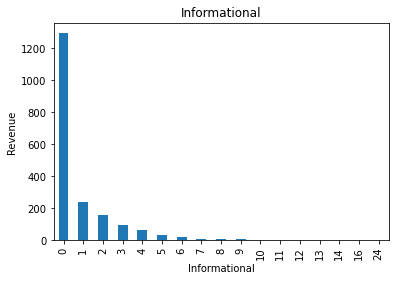

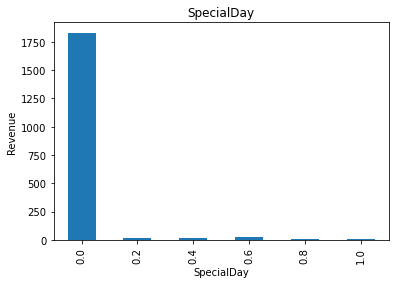

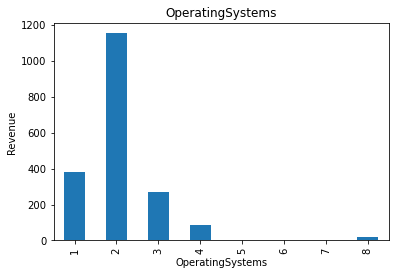

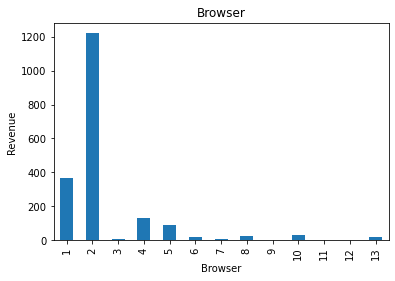

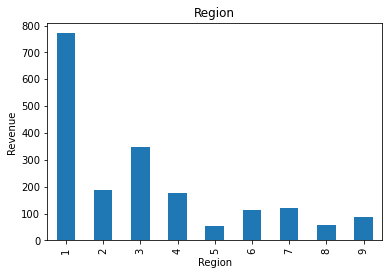

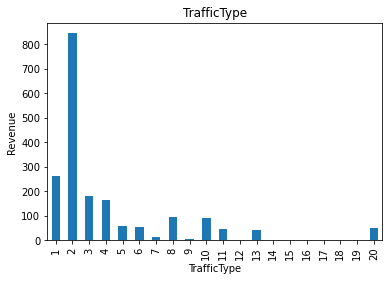

In [9]:
#### Relationship b/w taget and discrete variables
for variables in dis_variables:
    data=df.copy()
    data.groupby(variables)['Revenue'].sum().plot.bar()
    plt.xlabel(variables)
    plt.ylabel('Revenue')
    plt.title(variables)
    plt.show()

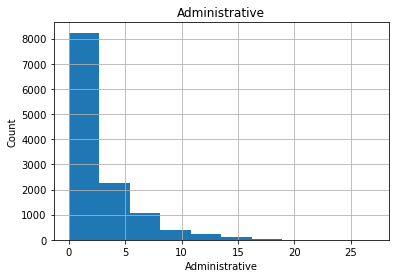

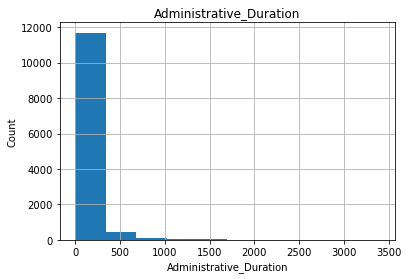

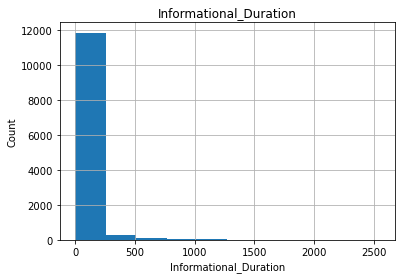

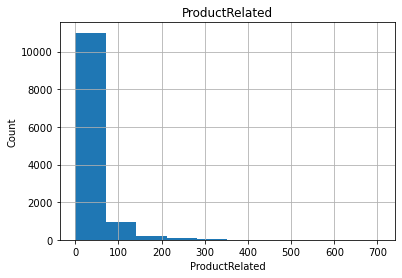

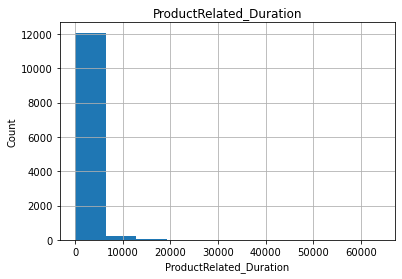

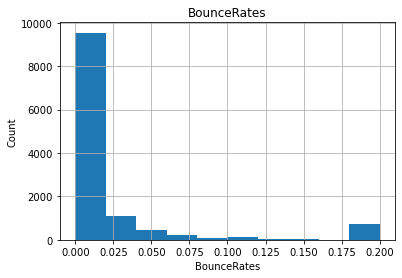

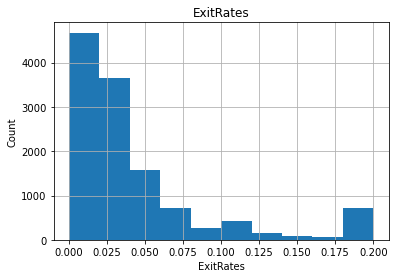

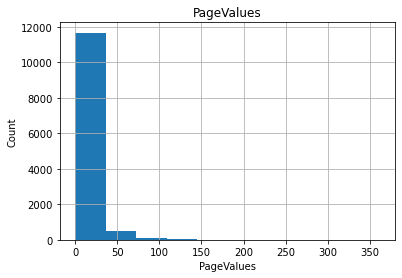

In [10]:
### Distributuion of Continuous variables
for variables in cont_variables:
    data = df.copy()
    data[variables].hist(bins=10)
    plt.xlabel(variables)
    plt.ylabel("Count")
    plt.title(variables)
    plt.show()

In [11]:
#### checking for categorical variables
cat_variables = [variables for variables in df.columns if df[variables].dtypes == 'O']
print(len(cat_variables))
df[cat_variables].head()

2


,Month,VisitorType
0,Feb,Returning_Visitor
1,Feb,Returning_Visitor
2,Feb,Returning_Visitor
3,Feb,Returning_Visitor
4,Feb,Returning_Visitor


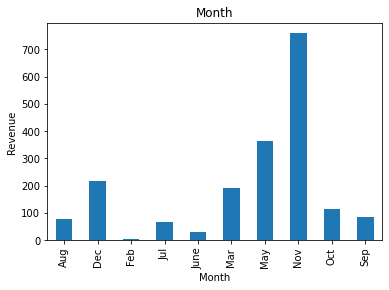

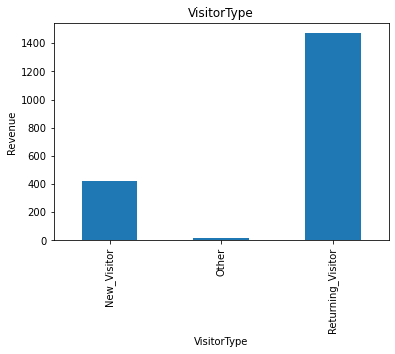

In [12]:
#### Finding the relationship b/w categorical and target variables
for variables in cat_variables:
    data = df.copy()
    data.groupby(variables)['Revenue'].sum().plot.bar()
    plt.xlabel(variables)
    plt.ylabel('Revenue')
    plt.title(variables)
    plt.show()
    

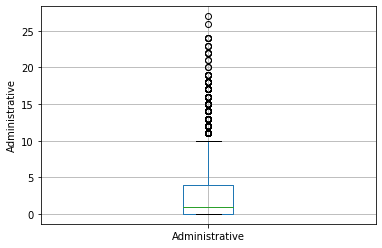

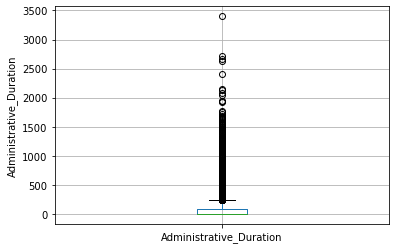

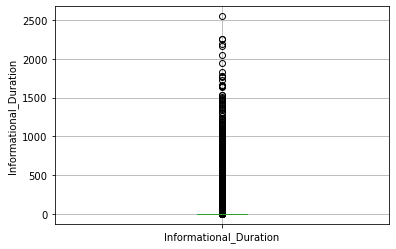

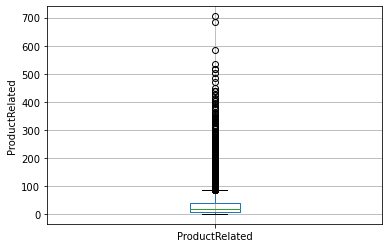

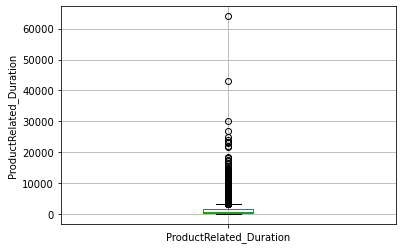

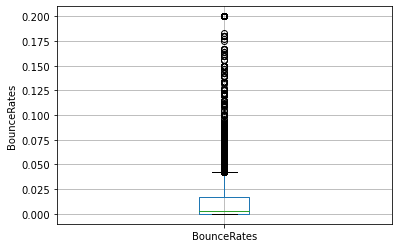

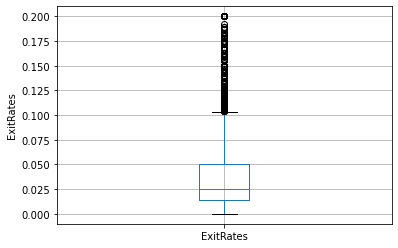

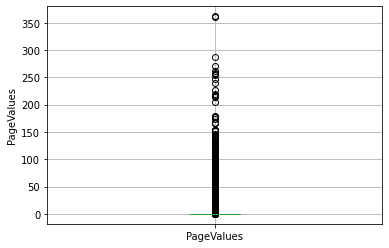

In [13]:
#### Outliers Detection

for variables in cont_variables:
    data = df.copy()
    
    data[variables] = (data[variables])
    data.boxplot(column = variables)
    plt.ylabel(variables)
    plt.show()

In [14]:
#### Checking for Rare values

for variables in cat_variables:
    temp=df.groupby(variables)['Revenue'].count()/len(df)
    print(temp)
    temp_df=temp[temp>0.01].index
    print(temp_df)
    #df[variables]=np.where(df[variables].isin(temp_df),df[variables],'Rare_var')

Month
Aug     0.035118
Dec     0.140065
Feb     0.014923
Jul     0.035036
June    0.023358
Mar     0.154663
May     0.272830
Nov     0.243147
Oct     0.044526
Sep     0.036334
Name: Revenue, dtype: float64
Index(['Aug', 'Dec', 'Feb', 'Jul', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep'], dtype='object', name='Month')
VisitorType
New_Visitor          0.137388
Other                0.006894
Returning_Visitor    0.855718
Name: Revenue, dtype: float64
Index(['New_Visitor', 'Returning_Visitor'], dtype='object', name='VisitorType')


In [15]:
#### Transforming categorical variables so it can be scaled

for variables in cat_variables:
    labels_ordered=df.groupby([variables])['Revenue'].count().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    print(labels_ordered)
    df[variables]=df[variables].map(labels_ordered)

{'Feb': 0, 'June': 1, 'Jul': 2, 'Aug': 3, 'Sep': 4, 'Oct': 5, 'Dec': 6, 'Mar': 7, 'Nov': 8, 'May': 9}
{'Other': 0, 'New_Visitor': 1, 'Returning_Visitor': 2}


In [16]:
#### Transformining the boolean variables (Weekend and Revenue)

for variables in ['Weekend','Revenue']:
    df[variables] = np.where(df[variables].isin([0]),0,1)

In [17]:
#### Since the data is in different units/scales, we need to scale it

scaling_variables=[variables for variables in df.columns if variables not in ['Revenue'] ]
len(scaling_variables)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[scaling_variables])
scaled_data = pd.DataFrame(scaler.fit_transform(df[scaling_variables]),columns=scaling_variables)
scaled_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.0,0.000000,0.000000,0.000,0.000000,1.0,0.0
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,0.0,0.142857,0.083333,0.000,0.052632,1.0,0.0
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.0,0.428571,0.000000,1.000,0.105263,1.0,0.0
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,0.0,0.285714,0.083333,0.125,0.157895,1.0,0.0
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,0.0,0.285714,0.166667,0.000,0.157895,1.0,1.0


In [18]:
df1 = pd.concat([scaled_data,df['Revenue'].reset_index(drop=True)],axis=1)
df1.to_csv('Cleaned_data.csv')

In [19]:
#### Correlation check
pd.options.display.float_format = '{:,.2f}'.format
corr_matrix = df1.corr()
corr_matrix

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Administrative,1.00,0.60,0.38,0.26,0.43,0.37,-0.22,-0.32,0.10,-0.09,-0.04,-0.01,-0.03,-0.01,-0.03,-0.02,0.03,0.14
Administrative_Duration,0.60,1.00,0.30,0.24,0.29,0.36,-0.14,-0.21,0.07,-0.07,-0.01,-0.01,-0.02,-0.01,-0.01,-0.02,0.01,0.09
Informational,0.38,0.30,1.00,0.62,0.37,0.39,-0.12,-0.16,0.05,-0.05,0.00,-0.01,-0.04,-0.03,-0.03,0.06,0.04,0.10
Informational_Duration,0.26,0.24,0.62,1.00,0.28,0.35,-0.07,-0.11,0.03,-0.03,0.00,-0.01,-0.02,-0.03,-0.02,0.05,0.02,0.07
ProductRelated,0.43,0.29,0.37,0.28,1.00,0.86,-0.20,-0.29,0.06,-0.02,0.01,0.00,-0.01,-0.04,-0.04,0.13,0.02,0.16
ProductRelated_Duration,0.37,0.36,0.39,0.35,0.86,1.00,-0.18,-0.25,0.05,-0.04,0.02,0.00,-0.01,-0.03,-0.04,0.12,0.01,0.15
BounceRates,-0.22,-0.14,-0.12,-0.07,-0.20,-0.18,1.00,0.91,-0.12,0.07,-0.00,0.02,-0.02,-0.01,0.08,0.11,-0.05,-0.15
ExitRates,-0.32,-0.21,-0.16,-0.11,-0.29,-0.25,0.91,1.00,-0.17,0.10,-0.00,0.01,-0.00,-0.01,0.08,0.15,-0.06,-0.21
PageValues,0.10,0.07,0.05,0.03,0.06,0.05,-0.12,-0.17,1.00,-0.06,0.02,0.02,0.05,0.01,0.01,-0.12,0.01,0.49
SpecialDay,-0.09,-0.07,-0.05,-0.03,-0.02,-0.04,0.07,0.10,-0.06,1.00,0.22,0.01,0.00,-0.02,0.05,0.09,-0.02,-0.08


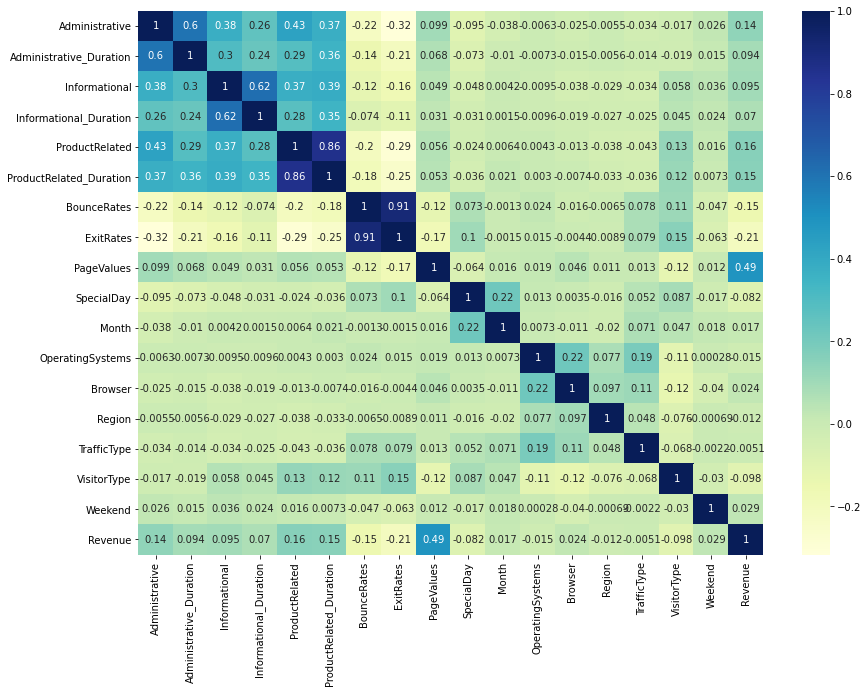

In [20]:
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

In [21]:
#### Using SelectFromModel, we will only select the important variables that explains our target  variable

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
X = df1[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend']]
y =df1['Revenue']

In [22]:
y.value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [23]:
#### Since the target is highly imbalanced, we need to balance it to avoid overfitting
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state=11)
X_resampled, y_resampled = os.fit_resample(X,y)

In [24]:
#### Splitting our data
print(len(X),len(X_resampled))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size = 0.3, random_state = 12)
print(len(X_train),len(y_train),len(X_test),len(y_test))

12330 20844
14590 14590 6254 6254


In [25]:
#### Applying Logistic Reg
from  sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score,recall_score,f1_score

In [26]:
params = {"penalty": ["l1", "l2", "elasticnet", "none"],"C": [1.0, 1.5, 0.5],
          "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],"max_iter": [100, 150, 180]}
log_model = LogisticRegression()
model1 = GridSearchCV(estimator=log_model, param_grid=params,scoring = "accuracy",refit = True,verbose = 4, cv = 5)
model1.fit(X_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=10

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Esti

[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.831, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.812, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.818, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.829, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.816, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.831, total=   0.3s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.812, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.818, total=   0.3s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.829, total=   0.3s
[CV] C=1.0, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l2, solver=newton-cg, score=0.809, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l2, solver=newton-cg, score=0.817, total=   0.1s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.0, max_iter=100, penalty=elasticnet, solver=newton-cg .......
[CV]  C=1.0, max_iter=100, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=elasticnet, solver=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.818, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.826, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, tota

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=100, penalty=none, solver=sag, score=0.816, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=100, penalty=none, solver=sag, score=0.831, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=100, penalty=none, solver=sag, score=0.813, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=100, penalty=none, solver=sag, score=0.818, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=100, penalty=none, solver=sag, score=0.826, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=100, penalty=none, solver=saga, score=0.816, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=100, penalty=none, solver=saga, score=0.831, total=   0.2s
[CV] C=1.0, 

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.0, max_iter=150, penalty=l1, solver=liblinear, score=0.831, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=liblinear, score=0.812, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=liblinear, score=0.818, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=liblinear, score=0.829, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.816, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.831, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.812, total=   0.3s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.818, total=   0.3s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.829, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l2, solver=newton-cg, score=0.809, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l2, solver=newton-cg, score=0.817, total=   0.1s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.0, max_iter=150, penalty=elasticnet, solver=liblinear .......
[CV]  C=1.0, max_iter=150, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=elasticnet, solver=sag .............
[CV]  C=1.0, max_iter=150, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=elasticnet, solver=sag .............
[CV]  C=1.0, max_iter=150, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=elasticnet, solver=sag .............
[CV]  C=1.0, max_iter=150, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=elasticnet, solver=sag .............
[CV]  C=1.0, max_iter=150, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=elasticnet, solver=sag .............
[CV]  C=1.0, max_iter=150, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=elasticnet, solver=saga .....

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.831, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.813, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.818, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.826, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=150, penalty=none, solver=saga, score=0.816, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=150, penalty=none, solver=saga, score=0.831, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_ite

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.831, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.812, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.818, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.829, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.816, total=   0.3s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.831, total=   0.3s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.812, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.818, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.829, total=   0.3s
[CV] C=1.0, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=180, penalty=l2, solver=newton-cg, score=0.809, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=180, penalty=l2, solver=newton-cg, score=0.817, total=   0.1s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.0, max_iter=180, penalty=none, solver=newton-cg, score=0.816, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=180, penalty=none, solver=newton-cg, score=0.831, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=180, penalty=none, solver=newton-cg, score=0.813, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=180, penalty=none, solver=newton-cg, score=0.818, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=180, penalty=none, solver=newton-cg, score=0.826, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=180, penalty=none, solver=lbfgs, score=0.816, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=180, penalty=none, solver=lbfgs, score=0

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.831, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.813, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.818, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.826, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=180, penalty=none, solver=saga, score=0.816, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=180, penalty=none, solver=saga, score=0.831, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_ite

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.831, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.812, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.818, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.828, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.816, total=   0.3s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.831, total=   0.3s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.812, total=   0.3s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.818, total=   0.3s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.828, total=   0.3s
[CV] C=1.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.811, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.820, total=   0.1s
[CV] C=1.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.831, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.813, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.818, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.826, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.816, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.831, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.813, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Se

[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.818, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.826, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, tota

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarnin

[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.816, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.831, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.813, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.818, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.826, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.816, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.831, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.813, total=   0.2s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.818, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.826, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=lbfgs ...................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] 

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.5, max_iter=150, penalty=l1, solver=liblinear, score=0.831, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=liblinear, score=0.812, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=liblinear, score=0.818, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=liblinear, score=0.828, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.816, total=   0.3s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.831, total=   0.3s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.812, total=   0.3s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.818, total=   0.3s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.828, total=   0.3s
[CV] C=1.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.811, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.820, total=   0.1s
[CV] C=1.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.816, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.831, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.813, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.818, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.826, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.816, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.831, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.813, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.818, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.826, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U


[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.816, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.831, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.813, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.818, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.826, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.816, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.831, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.813, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.818, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.826, total=   0.2s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=lbfgs ...................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=lbfgs ...................
[CV]  C=1.5, m

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.831, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.812, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.818, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.828, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.816, total=   0.3s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.831, total=   0.3s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.812, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.818, total=   0.3s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.828, total=   0.3s
[CV] C=1.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.811, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.820, total=   0.1s
[CV] C=1.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.816, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.831, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.813, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.818, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.826, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.816, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.831, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.813, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.818, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.826, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, tota

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the li

[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.816, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.831, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.813, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.818, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.826, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.816, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.831, total=   0.2s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.813, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.818, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.826, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] 

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.829, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.812, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.818, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.829, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.816, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.829, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.812, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.818, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.829, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.794, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.804, total=   0.1s
[CV] C=0.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=0.5, max_iter=100, penalty=elasticnet, solver=saga ............
[CV]  C=0.5, max_iter=100, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=elasticnet, solver=saga ............
[CV]  C=0.5, max_iter=100, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.816, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.831, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.813, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.818, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.826, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.816, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.831, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.813, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Se

[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.818, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.826, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, tota

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.831, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.813, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.818, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.826, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.816, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.831, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.813, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.818, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.826, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=lbfgs ...................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] 

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=0.5, max_iter=150, penalty=l1, solver=liblinear, score=0.829, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=liblinear, score=0.812, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=liblinear, score=0.818, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=liblinear, score=0.829, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.829, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.812, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.818, total=   0.3s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.829, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.794, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.804, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.782, total=   0.1s
[CV] C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.816, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.831, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.813, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.818, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.826, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.816, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.831, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.813, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.818, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.826, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, tota

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the li


[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.831, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.813, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.818, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.826, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.816, total=   0.2s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.831, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.813, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.818, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.826, total=   0.2s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=lbfgs ...................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=lbfgs ...................
[CV]  C=0.5, m

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.829, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.812, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.818, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.829, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.829, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.812, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.818, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.829, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.794, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.804, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.782, total=   0.1s
[CV] C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=0.5, max_iter=180, penalty=elasticnet, solver=saga ............
[CV]  C=0.5, max_iter=180, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.816, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.831, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.813, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.818, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.826, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.816, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.831, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.813, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.818, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.826, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=  

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the li


[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.831, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.813, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.818, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.826, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.816, total=   0.2s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.831, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.813, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.818, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.826, total=   0.2s


[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:   54.4s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 1.5, 0.5], 'max_iter': [100, 150, 180],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=4)

In [27]:
y_pred = model1.predict(X_test)
y_train_predict = model1.predict(X_train)
model1.best_estimator_

LogisticRegression(penalty='l1', solver='saga')

In [28]:
#### Checking all the relevant scores
print("Accuracy Score of Model1_train : ", accuracy_score(y_train,y_train_predict))
print("Accuracy Score of Model1_test : ", accuracy_score(y_test,y_pred))
print("precision Score of Model1 : ", precision_score(y_test,y_pred))
print("recall Score of Model1 : ", recall_score(y_test,y_pred))
print("F1 Score of Model1 : ", f1_score(y_test,y_pred))
ytrain_pred = model1.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = model1.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Accuracy Score of Model1_train :  0.8222755311857437
Accuracy Score of Model1_test :  0.8125999360409338
precision Score of Model1 :  0.8671726755218216
recall Score of Model1 :  0.7354361120051497
F1 Score of Model1 :  0.7958899338209684
RF train roc-auc: 0.8927676078669023
RF test roc-auc: 0.886066692991798


In [29]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model1,X,y,cv=10)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=10

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Esti

[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.868, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.863, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.870, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.888, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.868, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.862, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.870, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.869, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l2, solver=newton-cg, score=0.877, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l2, solver=newton-cg, score=0.862, total=   0.1s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV]  C=1.0, max_iter=100, penalty=none, solver=newton-cg, score=0.868, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=newton-cg, score=0.861, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=newton-cg, score=0.870, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=newton-cg, score=0.870, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.888, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.868, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.861, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.870, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3

[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.870, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=100, penalty=none, solver=sag, score=0.888, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.0, max_iter=150, penalty=l1, solver=liblinear, score=0.868, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=liblinear, score=0.863, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=liblinear, score=0.870, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.868, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.862, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.870, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.869, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l2, solver=newton-cg, score=0.877, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l2, solver=newton-cg, score=0.862, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_i

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV]  C=1.0, max_iter=150, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=elasticnet, solver=sag .............
[CV]  C=1.0, max_iter=150, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=elasticnet, solver=sag .............
[CV]  C=1.0, max_iter=150, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=elasticnet, solver=sag .............
[CV]  C=1.0, max_iter=150, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=elasticnet, solver=sag .............
[CV]  C=1.0, max_iter=150, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=elasticnet, solver=saga ............
[CV]  C=1.0, max_iter=150, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=elasticnet, solver=saga ............
[CV]  C=1.0, max_iter=150, penalty=elasticnet, solver=saga, score=na

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.868, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.861, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.870, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.870, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=150, penalty=none, solver=saga, score=0.888, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=150, penalty=none, solver=saga, score=0.868, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_ite

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.868, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.863, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.870, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.888, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.868, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=liblinear .......
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=liblinear .......
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.888, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.868, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.861, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.870, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.870, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=180, penalty=none, solver=saga, score=0.888, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=180, penalty=none, solver=saga, score=0.868, total=   0.2s
[CV] C=1.0, 

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.868, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.862, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.869, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.888, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.868, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.862, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.869, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.869, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.881, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.867, total=   0.1s
[CV] C=1.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.888, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.868, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.861, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.870, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.870, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.888, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarni

[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.868, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.861, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.870, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWa

[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.870, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.888, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.861, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.870, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.870, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.888, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.868, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.861, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.870, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.870, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va

[CV]  C=1.5, max_iter=150, penalty=l1, solver=liblinear, score=0.888, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=liblinear, score=0.868, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=liblinear, score=0.862, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.888, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.868, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.862, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.869, total=   0.3s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.869, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.881, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.867, total=   0.0s
[CV] C=1.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.5, max_iter=150, penalty=elasticnet, solver=newton-cg .......
[CV]  C=1.5, max_iter=150, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=elasticnet, solver=newton-cg .......
[CV]  C=1.5, max_iter=150, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=elasticnet, solver=newton-cg .......
[CV]  C=1.5, max_iter=150, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.5, max_iter=150, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.5, max_iter=150, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.5, max_iter=150, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=elasticnet,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.888, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.868, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.861, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.870, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.870, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, tota

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the li

[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.868, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.861, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.870, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.870, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.888, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.868, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.861, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.870, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.870, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va

[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.868, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.862, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.868, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.862, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.869, total=   0.3s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.869, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.881, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.867, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_i

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.888, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.868, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.861, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.870, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.870, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.888, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.868, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.861, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.870, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U

[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.870, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.888, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.861, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.870, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.870, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.888, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.868, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.861, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.870, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va

[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.861, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.869, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.887, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.861, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.857, total=   0.1s
[CV] C=0.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.861, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.888, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarni

[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.861, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWa

[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.888, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.861, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.870, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.888, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.861, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.870, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va

[CV]  C=0.5, max_iter=150, penalty=l1, solver=liblinear, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=liblinear, score=0.861, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=liblinear, score=0.871, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=liblinear, score=0.869, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.887, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.861, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.871, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.857, total=   0.1s
[CV] C=0.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.888, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.861, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.888, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.861, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U

[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.888, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.861, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.870, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.888, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.861, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.870, total=   0.3s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va

[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.861, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.871, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.869, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.887, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.861, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.857, total=   0.0s
[CV] C=0.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.861, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.870, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.888, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.861, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U

[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.888, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.861, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.888, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.868, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.861, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.870, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.870, total=   0.1s
Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:   39.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\si

[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=1.0, max_it

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs sup


[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.861, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.868, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.888, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.872, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.860, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.869, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.869, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l2, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=1

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.0, max_iter=100, penalty=none, solver=newton-cg, score=0.871, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=newton-cg, score=0.862, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=newton-cg, score=0.867, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=newton-cg, score=0.871, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.889, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.871, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.862, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.867, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.871, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[CV]  C=1.0, max_iter=100, penalty=none, solver=sag, score=0.889, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=100, penalty=none, solver=sag, score=0.871, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=100, penalty=none, solver=sag, score=0.862, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=100, penalty=none, solver=sag, score=0.867, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=100, penalty=none, solver=sag, score=0.871, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=100, penalty=none, solver=saga, score=0.889, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=100, penalty=none, solver=saga, score=0.871, total=   0.2s
[CV] C=1.0, 

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s suppo

[CV]  C=1.0, max_iter=100, penalty=none, solver=saga, score=0.867, total=   0.3s
[CV] C=1.0, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=100, penalty=none, solver=saga, score=0.871, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.888, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.860, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.869, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.869, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l2, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l2, solver=newton-cg, score=0.866, total=   0.1s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.871, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.862, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.867, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.871, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=150, penalty=none, solver=lbfgs, score=0.889, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=150, penalty=none, solver=lbfgs, score=0.871, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=150, penalty=none, solver=lbfgs, score=0.862

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.889, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.871, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.862, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.867, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.871, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=150, penalty=none, solver=saga, score=0.889, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=150, penalty=none, solver=saga, score=0.871, total=   0.2s
[CV] C=1.0, 

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.861, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.868, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.869, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.888, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.860, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.869, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.869, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=180, penalty=l2, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=180, penalty=l2, solver=newton-cg, score=0.866, total=   0.1s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.0, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=180, penalty=none, solver=newton-cg, score=0.871, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=180, penalty=none, solver=newton-cg, score=0.862, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=180, penalty=none, solver=newton-cg, score=0.867, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=180, penalty=none, solver=newton-cg, score=0.871, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=180, penalty=none, solver=lbfgs, score=0.889, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=180, penalty=none, solver=lbfgs, score=0.871, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=lbfgs ............

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.862, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.867, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.871, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=180, penalty=none, solver=saga, score=0.889, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=180, penalty=none, solver=saga, score=0.871, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=180, penalty=none, solver=saga, score=0.862, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_it

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\


[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.873, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.861, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.5, m

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.889, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.861, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.869, total=   0.3s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.870, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.881, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.868, total=   0.1s
[CV] C=1.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.862, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.867, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.889, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Se

[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.862, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.867, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-lear

[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.889, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.862, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.867, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.889, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.871, total=   0.2s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.862, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. De

[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.867, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.861, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.869, total=   0.3s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.870, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.881, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.868, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_i

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.5, max_iter=150, penalty=elasticnet, solver=sag .............
[CV]  C=1.5, max_iter=150, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=elasticnet, solver=sag .............
[CV]  C=1.5, max_iter=150, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=elasticnet, solver=sag .............
[CV]  C=1.5, max_iter=150, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=elasticnet, solver=saga ............
[CV]  C=1.5, max_iter=150, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=elasticnet, solver=saga ............
[CV]  C=1.5, max_iter=150, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=elasticnet, solver=saga ............
[CV]  C=1.5, max_iter=150, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=elasticnet, solver=saga ........

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.889, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.862, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.867, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U


[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.889, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.862, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.867, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.889, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.871, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.862, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.867, total=   0.3s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va


[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.873, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.861, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, m

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.889, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.861, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.869, total=   0.3s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.870, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.881, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.868, total=   0.1s
[CV] C=1.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.862, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.867, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.871, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.889, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.862, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.867, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U


[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.889, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.862, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.867, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.889, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.871, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.862, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.867, total=   0.3s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va


[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.859, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, m

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.888, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.871, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.858, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.870, total=   0.3s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.859, total=   0.1s
[CV] C=0.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.867, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.889, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.871, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.867, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarni

[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.889, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.867, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.871, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.889, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.871, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. De

[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.867, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.888, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.871, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.858, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.870, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.859, total=   0.1s
[CV] C=0.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV]  C=0.5, max_iter=150, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=elasticnet, solver=saga ............
[CV]  C=0.5, max_iter=150, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.889, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.862, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.867, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.889, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.867, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, tota

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the li

[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.867, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.889, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.871, total=   0.2s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.862, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.867, total=   0.3s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va

[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.859, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.871, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.858, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.870, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.859, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.851, total=   0.0s
[CV] C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=0.5, max_iter=180, penalty=elasticnet, solver=newton-cg .......
[CV]  C=0.5, max_iter=180, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=elasticnet, solver=newton-cg .......
[CV]  C=0.5, max_iter=180, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=0.5, max_iter=180, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=0.5, max_iter=180, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=0.5, max_iter=180, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=0.5, max_iter=180, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=elasticnet, sol

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.867, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.889, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.867, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, tota

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the li

[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.867, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.889, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.871, total=   0.2s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.862, total=   0.2s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.867, total=   0.3s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.871, total=   0.1s
Fitting 5 folds for each of 180 candidates, totalling 900 fits

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:   41.4s finished



[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=1.0, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Esti

[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.863, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_it

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.891, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.842, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.863, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.868, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.869, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l2, solver=newton-cg, score=0.880, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l2, solver=newton-cg, score=0.830, total=   0.1s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.0, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=newton-cg, score=0.833, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=newton-cg, score=0.862, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=newton-cg, score=0.868, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=newton-cg, score=0.869, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.891, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.833, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.862, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.868, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3

[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.869, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=100, penalty=none, solver=sag, score=0.891, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s suppo

[CV]  C=1.0, max_iter=100, penalty=none, solver=saga, score=0.868, total=   0.3s
[CV] C=1.0, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=100, penalty=none, solver=saga, score=0.869, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.842, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.863, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.868, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.869, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l2, solver=newton-cg, score=0.880, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l2, solver=newton-cg, score=0.830, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_i

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.833, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.862, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.868, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.869, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=150, penalty=none, solver=lbfgs, score=0.891, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=150, penalty=none, solver=lbfgs, score=0.833, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=150, penalty=none, solver=lbfgs, score=0.862

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.891, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.833, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.862, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.868, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.869, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=150, penalty=none, solver=saga, score=0.891, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=150, penalty=none, solver=saga, score=0.833, total=   0.2s
[CV] C=1.0, 

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.843, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.863, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.891, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.842, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.863, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.868, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=liblinear .......
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=liblinear .......
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.833, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.862, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.868, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.869, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=180, penalty=none, solver=saga, score=0.891, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=180, penalty=none, solver=saga, score=0.833, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=180, penalty=none, solver=saga, score=0.862, total=   0.2s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.841, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.864, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.868, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.840, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.865, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.868, total=   0.3s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.870, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.882, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.832, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.862, total=   0.1s
[CV] C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.833, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.862, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.868, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.891, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.833, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Se

[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.862, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.868, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWa

[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.891, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.833, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.862, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.868, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.891, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.833, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.862, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. De

[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.868, total=   0.3s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.840, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.865, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.868, total=   0.3s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.870, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.882, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.832, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_i

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.5, max_iter=150, penalty=elasticnet, solver=sag .............
[CV]  C=1.5, max_iter=150, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=elasticnet, solver=sag .............
[CV]  C=1.5, max_iter=150, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=elasticnet, solver=saga ............
[CV]  C=1.5, max_iter=150, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=elasticnet, solver=saga ............
[CV]  C=1.5, max_iter=150, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=elasticnet, solver=saga ............
[CV]  C=1.5, max_iter=150, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=elasticnet, solver=saga ............
[CV]  C=1.5, max_iter=150, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=elasticnet, solver=saga .......

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.862, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.868, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.891, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.833, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.862, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U

[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.868, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, tota

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.833, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.862, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.868, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.891, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.833, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.862, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.868, total=   0.3s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va

[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.841, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.865, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.868, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.840, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.865, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.868, total=   0.3s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.870, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.882, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.832, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_i

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV]  C=1.5, max_iter=180, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=elasticnet, solver=sag .............
[CV]  C=1.5, max_iter=180, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=elasticnet, solver=sag .............
[CV]  C=1.5, max_iter=180, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=elasticnet, solver=sag .............
[CV]  C=1.5, max_iter=180, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=elasticnet, solver=saga ............
[CV]  C=1.5, max_iter=180, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=elasticnet, solver=saga ............
[CV]  C=1.5, max_iter=180, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=elasticnet, solver=saga ............
[CV]  C=1.5, max_iter=180, penalty=elasticnet, solver=saga, score=n

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.862, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.868, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.891, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.833, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.862, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U

[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.868, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, tota

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.833, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.862, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.868, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.891, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.833, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.862, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.868, total=   0.3s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va

[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.850, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.864, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.863, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.869, total=   0.3s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.832, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.855, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, 

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.891, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.833, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.891, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Se

[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.833, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWa

[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.891, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.869, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.891, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.833, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.862, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.f

[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.868, total=   0.3s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV]  C=0.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.890, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.847, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.863, total=   0.1s
[CV] C=0.5, max_iter=150, penalt

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.891, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.833, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.868, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.891, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.833, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U

[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, tota

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.833, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.891, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.833, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.862, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.868, total=   0.3s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va

[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.850, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.864, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.863, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.869, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.870, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.832, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.855, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, 

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=0.5, max_iter=180, penalty=elasticnet, solver=saga ............
[CV]  C=0.5, max_iter=180, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=elasticnet, solver=saga ............
[CV]  C=0.5, max_iter=180, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=elasticnet, solver=saga ............
[CV]  C=0.5, max_iter=180, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.891, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.833, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.891, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.833, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U

[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, tota

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.833, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.891, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.833, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.862, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.868, total=   0.3s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.869, total=   0.1s
Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:   40.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\si

[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator

[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.873, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_it

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.896, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.882, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.873, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.872, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.872, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l2, solver=newton-cg, score=0.886, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l2, solver=newton-cg, score=0.866, total=   0.1s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=elasticnet, solver=liblinear .......
[CV]  C=1.0, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=elasticnet, solver=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.870, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s suppo

[CV]  C=1.0, max_iter=100, penalty=none, solver=saga, score=0.870, total=   0.3s
[CV] C=1.0, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=100, penalty=none, solver=saga, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.896, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.882, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.873, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.872, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l2, solver=newton-cg, score=0.886, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l2, solver=newton-cg, score=0.866, total=   0.1s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.897, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.875, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.874, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.870, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=150, penalty=none, solver=lbfgs, score=0.897, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=150, penalty=none, solver=lbfgs, score=0

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.875, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.874, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.870, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.872, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=150, penalty=none, solver=saga, score=0.897, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=150, penalty=none, solver=saga, score=0.875, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=150, penalty=none, solver=saga, score=0.874, total=   0.2s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.896, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.882, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.873, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.896, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.882, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.873, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.872, total=   0.3s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=180, penalty=l2, solver=newton-cg, score=0.886, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=180, penalty=l2, solver=newton-cg, score=0.866, total=   0.0s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=liblinear .......
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=liblinear .......
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=liblinear .......
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=liblinear .......
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=sag .............
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=sag .............
[CV]  C=1.0, max_iter=180, penalty=elast

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.875, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.874, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.870, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.872, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=180, penalty=none, solver=saga, score=0.897, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=180, penalty=none, solver=saga, score=0.875, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=180, penalty=none, solver=saga, score=0.874, total=   0.2s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\


[CV] C=1.5, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.898, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, p

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.880, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.872, total=   0.3s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.872, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.888, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.866, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.873, total=   0.1s
[CV] C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.875, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.874, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.870, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.897, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.875, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarni

[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.870, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, tota

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.874, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.870, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.897, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.875, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.874, total=   0.2s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.f

[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.870, total=   0.3s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.897, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.880, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.872, total=   0.3s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.872, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.888, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.866, total=   0.1s
[CV] C=1.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.5, max_iter=150, penalty=elasticnet, solver=sag .............
[CV]  C=1.5, max_iter=150, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=elasticnet, solver=sag .............
[CV]  C=1.5, max_iter=150, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=elasticnet, solver=saga ............
[CV]  C=1.5, max_iter=150, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=elasticnet, solver=saga ............
[CV]  C=1.5, max_iter=150, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=elasticnet, solver=saga ............
[CV]  C=1.5, max_iter=150, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=elasticnet, solver=saga ............
[CV]  C=1.5, max_iter=150, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=elasticnet, solver=saga .......

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.897, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.875, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.870, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, tota

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the li

[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.875, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.874, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.870, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.897, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.875, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.874, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.870, total=   0.3s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va

[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.898, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.880, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.897, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.880, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.872, total=   0.3s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.872, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.888, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.866, total=   0.1s
[CV] C=1.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.874, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.870, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.897, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.875, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.870, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.872, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U


[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.897, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.874, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.870, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.872, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.897, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.875, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.874, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.870, total=   0.3s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va

[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.887, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.873, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.873, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.873, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.872, total=   0.3s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.873, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.878, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.863, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, 

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV] C=0.5, max_iter=100, penalty=elasticnet, solver=saga ............
[CV]  C=0.5, max_iter=100, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.897, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.874, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs ......

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Se

[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, tota

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.874, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.897, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.875, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.874, total=   0.2s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.f

[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.870, total=   0.3s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.873, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.872, total=   0.3s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.873, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.878, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.863, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, 

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.874, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.870, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.897, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U


[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.897, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.874, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.872, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.897, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.875, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.874, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.870, total=   0.3s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va

[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.887, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.873, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.873, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.873, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.872, total=   0.3s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.873, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.878, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.863, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, 

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=0.5, max_iter=180, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=elasticnet, solver=liblinear .......
[CV]  C=0.5, max_iter=180, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=elasticnet, solver=liblinear .......
[CV]  C=0.5, max_iter=180, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=elasticnet, solver=liblinear .......
[CV]  C=0.5, max_iter=180, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=elasticnet, solver=liblinear .......
[CV]  C=0.5, max_iter=180, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=elasticnet, solver=sag .............
[CV]  C=0.5, max_iter=180, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=elasticnet, solver=sag .............
[CV]  C=0.5, max_iter=180, penalty=elast

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.874, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.870, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.897, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.874, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U

[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, tota

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.874, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.897, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.875, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.874, total=   0.2s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.870, total=   0.3s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.872, total=   0.1s


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:   42.9s finished


Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=10

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Esti


[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.877, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.868, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.873, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.877, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.868, total=   0.3s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.873, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l2, solver=newton-cg, score=0.886, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l2, solver=newton-cg, score=0.884, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_i

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.0, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=newton-cg, score=0.868, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.898, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.868, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3

[CV]  C=1.0, max_iter=100, penalty=none, solver=sag, score=0.898, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=100, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=100, penalty=none, solver=sag, score=0.877, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=100, penalty=none, solver=sag, score=0.869, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=100, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=100, penalty=none, solver=saga, score=0.898, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=100, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=1.0, 

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\


[CV] C=1.0, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=liblinear, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=liblinear, score=0.877, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=liblinear, score=0.868, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=liblinear, score=0.873, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.0, m

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.896, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.895, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.877, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.868, total=   0.3s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.873, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l2, solver=newton-cg, score=0.886, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l2, solver=newton-cg, score=0.884, total=   0.1s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV]  C=1.0, max_iter=150, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=150, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=150, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=elasticnet, solver=liblinear .......
[CV]  C=1.0, max_iter=150, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=elasticnet, solver=liblinear .......
[CV]  C=1.0, max_iter=150, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=elasticnet, solver=liblinear .......
[CV]  C=1.0, max_iter=150, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=elasticnet, solver=liblinear .......
[CV]  C=1.0, max_iter=150, penalty=elasticnet

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.877, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.869, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=150, penalty=none, solver=saga, score=0.898, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=150, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_ite

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.877, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.868, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.873, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.895, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.877, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.868, total=   0.3s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.873, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=180, penalty=l2, solver=newton-cg, score=0.886, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=180, penalty=l2, solver=newton-cg, score=0.884, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=180, penalty=l2, solver=newton-cg, score=0.870, total=   0.1s
[CV] C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=liblinear .......
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.877, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.869, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=180, penalty=none, solver=saga, score=0.898, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=180, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=180, penalty=none, solver=saga, score=0.877, total=   0.2s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.897, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.878, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.873, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.897, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.896, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.878, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.869, total=   0.3s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.873, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.888, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.891, total=   0.0s
[CV] C=1.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.5, max_iter=100, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=elasticnet, solver=sag .............
[CV]  C=1.5, max_iter=100, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=elasticnet, solver=sag .............
[CV]  C=1.5, max_iter=100, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=elasticnet, solver=sag .............
[CV]  C=1.5, max_iter=100, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=elasticnet, solver=sag .............
[CV]  C=1.5, max_iter=100, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=elasticnet, solver=saga ............
[CV]  C=1.5, max_iter=100, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=elasticnet, solver=saga ............
[CV]  C=1.5, max_iter=100, penalty=elasticnet, solver=saga, score=nan

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.868, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Se

[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.898, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-lear

[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.868, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, tota

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.898, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.877, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.869, total=   0.3s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va

[CV]  C=1.5, max_iter=150, penalty=l1, solver=liblinear, score=0.897, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=liblinear, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=liblinear, score=0.878, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=liblinear, score=0.873, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.897, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.896, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.878, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.869, total=   0.3s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.873, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.888, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.891, total=   0.1s
[CV] C=1.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.868, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.898, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.877, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.872, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.898, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarnin


[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.898, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.895, total=   0.2s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.877, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.869, total=   0.3s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va

[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.897, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.878, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.873, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.896, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.878, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.869, total=   0.3s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.873, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.888, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.891, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.873, total=   0.1s
[CV] C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.898, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.868, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.898, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.877, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.898, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarnin

[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.869, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.898, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.877, total=   0.3s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.869, total=   0.3s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va

[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.897, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.895, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.876, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.865, total=   0.1s
[CV] C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.898, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Se

[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.898, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.877, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.869, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va


[CV] C=0.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=liblinear, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=liblinear, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=liblinear, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=0.5, m

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.876, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.865, total=   0.1s
[CV] C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=0.5, max_iter=150, penalty=elasticnet, solver=saga ............
[CV]  C=0.5, max_iter=150, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=elasticnet, solver=saga ............
[CV]  C=0.5, max_iter=150, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.898, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.898, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, tota

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarnin


[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.898, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.877, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.869, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va

[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.897, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.872, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.895, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.876, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.865, total=   0.1s
[CV] C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=0.5, max_iter=180, penalty=elasticnet, solver=sag .............
[CV]  C=0.5, max_iter=180, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=elasticnet, solver=sag .............
[CV]  C=0.5, max_iter=180, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=elasticnet, solver=sag .............
[CV]  C=0.5, max_iter=180, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=elasticnet, solver=saga ............
[CV]  C=0.5, max_iter=180, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=elasticnet, solver=saga ............
[CV]  C=0.5, max_iter=180, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=elasticnet, solver=saga ............
[CV]  C=0.5, max_iter=180, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=elasticnet, solver=saga ........

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.898, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U

[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.898, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.869, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.872, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.898, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.877, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.869, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.872, total=   0.1s


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:   44.2s finished


Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=10

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Esti


[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.886, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.867, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.893, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.886, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.867, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l2, solver=newton-cg, score=0.880, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l2, solver=newton-cg, score=0.877, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_i

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.0, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=newton-cg, score=0.896, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=newton-cg, score=0.886, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=newton-cg, score=0.864, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.896, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.886, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.864, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3

[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=100, penalty=none, solver=sag, score=0.895, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s suppo

[CV]  C=1.0, max_iter=100, penalty=none, solver=saga, score=0.864, total=   0.3s
[CV] C=1.0, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=100, penalty=none, solver=saga, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.894, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.893, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.886, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.867, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l2, solver=newton-cg, score=0.880, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l2, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.896, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.886, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.864, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=150, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=150, penalty=none, solver=lbfgs, score=0.896, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=150, penalty=none, solver=lbfgs, score=0.886

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.896, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.886, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.864, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=150, penalty=none, solver=saga, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.894, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.893, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.886, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.867, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.872, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.894, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.893, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.886, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.867, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=180, penalty=l2, solver=newton-cg, score=0.880, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=180, penalty=l2, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.0, max_iter=180, penalty=none, solver=newton-cg, score=0.896, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=180, penalty=none, solver=newton-cg, score=0.886, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=180, penalty=none, solver=newton-cg, score=0.864, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=180, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=180, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=180, penalty=none, solver=lbfgs, score=0.896, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=180, penalty=none, solver=lbfgs, score=0.886

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.896, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.886, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.864, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=180, penalty=none, solver=saga, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.894, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.894, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.887, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.866, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.872, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.894, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.894, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.887, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.865, total=   0.3s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.882, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.880, total=   0.1s
[CV] C=1.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.896, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.886, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.864, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Se

[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.896, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.886, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.864, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-lear

[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.895, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.886, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.864, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.896, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.886, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.f

[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.864, total=   0.3s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.894, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.894, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.887, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.865, total=   0.3s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.882, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.880, total=   0.0s
[CV] C=1.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV] C=1.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.896, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.886, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.864, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.896, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.886, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.864, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U


[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.886, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.864, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.896, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.886, total=   0.2s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.864, total=   0.3s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va

[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.894, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.894, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.887, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.866, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.894, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.894, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.887, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.865, total=   0.3s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.882, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.880, total=   0.1s
[CV] C=1.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.896, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.886, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.864, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.896, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.886, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.864, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, tota

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the li

[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.896, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.886, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.864, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.896, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.886, total=   0.2s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.864, total=   0.3s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va


[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.892, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.886, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.866, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, m

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.892, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.886, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.866, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.873, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.873, total=   0.1s
[CV] C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.896, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.886, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.864, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.896, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Se

[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.886, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.864, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.896, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.886, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.864, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.896, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.886, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.f

[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.864, total=   0.3s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.892, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.886, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.866, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.873, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.873, total=   0.0s
[CV] C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=0.5, max_iter=150, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=0.5, max_iter=150, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=0.5, max_iter=150, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=0.5, max_iter=150, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=0.5, max_iter=150, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=elasticnet, solver=liblinear .......
[CV]  C=0.5, max_iter=150, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=elasticnet, solver=liblinear .......
[CV]  C=0.5, max_iter=150, penalty=elasticnet, solver=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.886, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.864, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.896, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.886, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.864, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.872, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the li


[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.864, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.896, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.886, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.864, total=   0.3s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va


[CV]  C=0.5, max_iter=180, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=lbfgs ...................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=lbfgs ...................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.892, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.892, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.886, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.866, total=   0.0s
[CV

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.892, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.886, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.866, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.873, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.868, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_i

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.896, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.886, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.864, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.896, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.886, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.864, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U

[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.896, total=  

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.886, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.864, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.896, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.886, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.864, total=   0.3s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.872, total=   0.2s


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:   43.1s finished


Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=10

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Esti

[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.883, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.863, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.871, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_it

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.895, total=   0.3s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.883, total=   0.3s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.863, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.871, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l2, solver=newton-cg, score=0.881, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l2, solver=newton-cg, score=0.878, total=   0.1s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.0, max_iter=100, penalty=elasticnet, solver=newton-cg .......
[CV]  C=1.0, max_iter=100, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=elasticnet, solver=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.882, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.862, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=100, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=100, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=100, penalty=none, solver=sag, score=0.882, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=100, penalty=none, solver=sag, score=0.862, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=100, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=100, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=100, penalty=none, solver=saga, score=0.895, total=   0.3s
[CV] C=1.0, 

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1.0, max_iter=100, penalty=none, solver=saga, score=0.883, total=   0.3s
[CV] C=1.0, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1.0, max_iter=100, penalty=none, solver=saga, score=0.862, total=   0.3s
[CV] C=1.0, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=100, penalty=none, solver=saga, score=0.872, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.0, max_iter=150, penalty=l1, solver=liblinear, score=0.883, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=liblinear, score=0.863, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=liblinear, score=0.871, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_it

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.895, total=   0.3s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.883, total=   0.3s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.863, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.871, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l2, solver=newton-cg, score=0.881, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l2, solver=newton-cg, score=0.878, total=   0.1s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.882, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.862, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=150, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=150, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=150, penalty=none, solver=lbfgs, score=0.882

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.882, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.862, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=150, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=1.

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.883, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.863, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.871, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_it

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.895, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.895, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.883, total=   0.3s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.863, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.871, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=180, penalty=l2, solver=newton-cg, score=0.881, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=180, penalty=l2, solver=newton-cg, score=0.878, total=   0.1s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.0, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=180, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=180, penalty=none, solver=newton-cg, score=0.882, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=180, penalty=none, solver=newton-cg, score=0.862, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=180, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=180, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=180, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=lbfgs ............

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.882, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.862, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=180, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=180, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_ite

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.883, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.863, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_it

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.895, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.895, total=   0.3s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.883, total=   0.3s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.863, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.871, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.885, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.880, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.873, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.863, total=   0.1s
[

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.882, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.862, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Se

[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.882, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.862, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-lear

[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.895, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.882, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.862, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.883, total=   0.3s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.862, total=   0.3s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.872, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.5, max_iter=150, penalty=l1, solver=liblinear, score=0.883, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=liblinear, score=0.863, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=liblinear, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_it

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.895, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.895, total=   0.3s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.883, total=   0.3s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.863, total=   0.3s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.871, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.885, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.880, total=   0.1s
[CV] C=1.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.882, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.862, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.882, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.862, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U


[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.882, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.862, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.883, total=   0.3s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.862, total=   0.3s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.872, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=lbfgs ...................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] 

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.883, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.863, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_it

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.895, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.895, total=   0.3s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.883, total=   0.3s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.863, total=   0.3s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.871, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.885, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.880, total=   0.1s
[CV] C=1.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.882, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.862, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.882, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.862, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.895, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarnin

[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.882, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.862, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.895, total=   0.3s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.883, total=   0.3s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.862, total=   0.3s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.872, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] 

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.883, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.864, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_it

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.892, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.893, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.883, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.863, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.872, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=0.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.882, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Se

[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.882, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-lear

[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.895, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.882, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.883, total=   0.3s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.862, total=   0.3s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.872, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=0.5, max_iter=150, penalty=l1, solver=liblinear, score=0.883, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=liblinear, score=0.864, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=liblinear, score=0.871, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_it

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.892, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.893, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.883, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.863, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=0.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.882, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.882, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.895, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarnin

[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.882, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.862, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.895, total=   0.3s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.883, total=   0.3s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.862, total=   0.3s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.872, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=lbfgs ...................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] 

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.883, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.864, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_it

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.892, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.893, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.883, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.863, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.872, total=   0.0s
[CV] C=0.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.882, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.862, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.872, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.882, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.872, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarnin

[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.882, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.862, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.883, total=   0.3s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.862, total=   0.3s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.872, total=   0.2s


[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:   49.3s finished


Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=10

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Esti

[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.879, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.861, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.873, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_it

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.897, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.895, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.879, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.861, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.872, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l2, solver=newton-cg, score=0.883, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l2, solver=newton-cg, score=0.879, total=   0.1s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.0, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=newton-cg, score=0.878, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=newton-cg, score=0.861, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.900, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs ............

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=100, penalty=none, solver=sag, score=0.900, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s suppo

[CV]  C=1.0, max_iter=100, penalty=none, solver=saga, score=0.861, total=   0.3s
[CV] C=1.0, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=100, penalty=none, solver=saga, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.897, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.895, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.879, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.861, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.872, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l2, solver=newton-cg, score=0.883, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l2, solver=newton-cg, score=0.879, total=   0.1s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.0, max_iter=150, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=elasticnet, solver=newton-cg .......
[CV]  C=1.0, max_iter=150, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=elasticnet, solver=newton-cg .......
[CV]  C=1.0, max_iter=150, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=150, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=150, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=150, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=150, penalty=elasticnet,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.878, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.861, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=150, penalty=none, solver=saga, score=0.900, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=150, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=150, penalty=none, solver=saga, score=0.878, total=   0.2s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.897, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.879, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.861, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.873, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.897, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.895, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.879, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.861, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.872, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=180, penalty=l2, solver=newton-cg, score=0.883, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=180, penalty=l2, solver=newton-cg, score=0.879, total=   0.1s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.0, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=180, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=180, penalty=none, solver=newton-cg, score=0.878, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=180, penalty=none, solver=newton-cg, score=0.861, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=180, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=180, penalty=none, solver=lbfgs, score=0.900, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=180, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=lbfgs ............

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.878, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.861, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=180, penalty=none, solver=saga, score=0.900, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=180, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=180, penalty=none, solver=saga, score=0.878, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_it

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.897, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.879, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.861, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.897, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.878, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.861, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.872, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.887, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.881, total=   0.1s
[CV] C=1.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.878, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.861, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.900, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.861, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-lear

[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.900, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.878, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.861, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.900, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.878, total=   0.2s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.f

[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.861, total=   0.3s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.878, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.861, total=   0.3s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.872, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.887, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.881, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.871, total=   0.1s
[CV] C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.878, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.861, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.900, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.861, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U


[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.900, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.895, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.878, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.861, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.900, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.878, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.861, total=   0.3s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va

[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.897, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.879, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.861, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.878, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.861, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.887, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.881, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.871, total=   0.1s
[CV] C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.878, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.861, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.900, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.861, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U

[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.900, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.878, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.861, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.900, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.878, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.861, total=   0.3s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va

[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.896, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.879, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.863, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.896, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.878, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.863, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.876, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.873, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.860, total=   0.0s
[CV] C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.878, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.861, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.900, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.861, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.861, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.900, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.878, total=   0.2s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.f

[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.861, total=   0.3s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.896, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.878, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.863, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.876, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.873, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.860, total=   0.1s
[CV] C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=0.5, max_iter=150, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=0.5, max_iter=150, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=0.5, max_iter=150, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=elasticnet, solver=liblinear .......
[CV]  C=0.5, max_iter=150, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=elasticnet, solver=liblinear .......
[CV]  C=0.5, max_iter=150, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=elasticnet, solver=liblinear .......
[CV]  C=0.5, max_iter=150, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=elasticnet, solver=liblinear .......
[CV]  C=0.5, max_iter=150, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=elastic

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.878, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.861, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.900, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U

[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.861, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, tota

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.878, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.861, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.900, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.878, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.861, total=   0.3s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va


[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.896, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.879, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.863, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.872, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=0.5, m

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.896, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.878, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.863, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.876, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.873, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.860, total=   0.1s
[CV] C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.878, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.861, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.900, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.861, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U

[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.900, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.878, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.861, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.872, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.900, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.878, total=   0.2s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.861, total=   0.3s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.872, total=   0.1s
Fitting 5 folds for each of 180 candidates, totalling 900 fits

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:   41.4s finished



[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=1.0, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Esti


[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.878, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.861, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.871, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.879, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.860, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.871, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l2, solver=newton-cg, score=0.883, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l2, solver=newton-cg, score=0.877, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l2, solver=newton-cg, score=0.867, total=   0.1s
[CV] C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.0, max_iter=100, penalty=elasticnet, solver=sag .............
[CV]  C=1.0, max_iter=100, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=elasticnet, solver=saga ............
[CV]  C=1.0, max_iter=100, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=elasticnet, solver=saga ............
[CV]  C=1.0, max_iter=100, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=elasticnet, solver=saga ............
[CV]  C=1.0, max_iter=100, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=elasticnet, solver=saga ............
[CV]  C=1.0, max_iter=100, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=elasticnet, solver=saga ............
[CV]  C=1.0, max_iter=100, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=newton-cg .......

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3


[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.871, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\


[CV] C=1.0, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=liblinear, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=liblinear, score=0.878, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=liblinear, score=0.861, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=liblinear, score=0.871, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.0, m

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.897, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.879, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.860, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.871, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l2, solver=newton-cg, score=0.883, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l2, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.898, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.896, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.860, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.871, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=150, penalty=none, solver=lbfgs, score=0.898, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=150, penalty=none, solver=lbfgs, score=0

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.898, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.896, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.877, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.860, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.871, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=150, penalty=none, solver=saga, score=0.898, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=150, penalty=none, solver=saga, score=0.896, total=   0.1s
[CV] C=1.0, 

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.897, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.878, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.861, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.871, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.897, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.879, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.860, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.871, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=180, penalty=l2, solver=newton-cg, score=0.883, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=180, penalty=l2, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.0, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=180, penalty=none, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=180, penalty=none, solver=newton-cg, score=0.860, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=180, penalty=none, solver=newton-cg, score=0.871, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=180, penalty=none, solver=lbfgs, score=0.898, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=180, penalty=none, solver=lbfgs, score=0.896, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=180, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=lbfgs ................

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.898, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.896, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.877, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.860, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.871, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=180, penalty=none, solver=saga, score=0.898, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=180, penalty=none, solver=saga, score=0.896, total=   0.1s
[CV] C=1.0, 

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.898, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.896, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.878, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.860, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.898, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.895, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.878, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.860, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.871, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.888, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.882, total=   0.1s
[CV] C=1.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.5, max_iter=100, penalty=elasticnet, solver=saga ............
[CV]  C=1.5, max_iter=100, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=elasticnet, solver=saga ............
[CV]  C=1.5, max_iter=100, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=elasticnet, solver=saga ............
[CV]  C=1.5, max_iter=100, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.898, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.896, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.877, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.860, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.898, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod


[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.896, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.860, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the li

[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.896, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.860, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.898, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.896, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.877, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.860, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.871, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=lbfgs ...................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] 

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\


[CV] C=1.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=liblinear, score=0.878, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=liblinear, score=0.860, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=liblinear, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.898, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.895, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.878, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.860, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.888, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.882, total=   0.1s
[CV] C=1.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.860, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.898, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.896, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.860, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.898, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarnin

[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.860, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.871, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.898, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.896, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.860, total=   0.2s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=lbfgs ...................
[CV]  C=1.5

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va

[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.898, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.896, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.878, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.860, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.898, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.895, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.878, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.860, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.871, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.888, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.882, total=   0.1s
[CV] C=1.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.898, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.896, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.860, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.898, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.896, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.860, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, tota

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the li

[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.896, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.860, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.871, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.898, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.896, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.877, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.860, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] 

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.880, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.861, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_it

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.879, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.861, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.876, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.873, total=   0.1s
[CV] C=0.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.896, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.860, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.898, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.896, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.860, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U


[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.898, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.896, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.860, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.898, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.896, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.877, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.860, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va


[CV] C=0.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=liblinear, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=liblinear, score=0.880, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=liblinear, score=0.861, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=liblinear, score=0.870, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=0.5, m

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.879, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.861, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.876, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.873, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.860, total=   0.1s
[CV] C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=0.5, max_iter=150, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=0.5, max_iter=150, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=0.5, max_iter=150, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=0.5, max_iter=150, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=elasticnet, solver=liblinear .......
[CV]  C=0.5, max_iter=150, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=elasticnet, solver=liblinear .......
[CV]  C=0.5, max_iter=150, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=elasticnet, solver=liblinear .......
[CV]  C=0.5, max_iter=150, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=elasticnet,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.860, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.898, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.896, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.860, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U

[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.898, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.860, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.898, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.896, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.877, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.860, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va

[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=lbfgs ...................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] 

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.879, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.861, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.876, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.873, total=   0.0s
[CV] C=0.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.860, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.871, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.898, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.896, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.860, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U

[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.898, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.896, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.877, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.860, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.871, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.898, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.896, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.860, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.871, total=   0.1s


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:   37.8s finished


Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=10

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Esti

[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.878, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.859, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=100, penalty=l1, solver=liblinear, score=0.876, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_it

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.897, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.895, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.878, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.859, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=100, penalty=l1, solver=saga, score=0.876, total=   0.2s
[CV] C=1.0, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l2, solver=newton-cg, score=0.883, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=100, penalty=l2, solver=newton-cg, score=0.878, total=   0.1s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.0, max_iter=100, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=newton-cg, score=0.858, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=newton-cg, score=0.875, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.898, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3

[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.858, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=100, penalty=none, solver=lbfgs, score=0.875, total=   0.1s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.0, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.0, max_iter=100, penalty=none, solver=liblinear, score=nan, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.0, max_iter=150, penalty=l1, solver=liblinear, score=0.897, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=liblinear, score=0.894, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=liblinear, score=0.878, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=liblinear, score=0.859, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=150, penalty=l1, solver=liblinear, score=0.876, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.897, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.895, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.878, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.859, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=150, penalty=l1, solver=saga, score=0.876, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l2, solver=newton-cg, score=0.883, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=150, penalty=l2, solver=newton-cg, score=0.878, total=   0.0s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.858, total=   0.0s
[CV] C=1.0, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.0, max_iter=150, penalty=none, solver=newton-cg, score=0.875, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=150, penalty=none, solver=lbfgs, score=0.898, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=150, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.0, max_iter=150, penalty=none, solver=lbfgs, score=0.877

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.877, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.858, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=150, penalty=none, solver=sag, score=0.875, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=150, penalty=none, solver=saga, score=0.898, total=   0.1s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=150, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=150, penalty=none, solver=saga, score=0.877, total=   0.2s
[CV] C=1.0, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=150, penalty=none, solver=saga, score=0.858, total=   0.2s
[CV] C=1.0

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.897, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.894, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.878, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.859, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.0, max_iter=180, penalty=l1, solver=liblinear, score=0.876, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.897, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.895, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.878, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.859, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.0, max_iter=180, penalty=l1, solver=saga, score=0.876, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=180, penalty=l2, solver=newton-cg, score=0.883, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.0, max_iter=180, penalty=l2, solver=newton-cg, score=0.878, total=   0.1s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=newton-cg .......
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=newton-cg .......
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.0, max_iter=180, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=1.0, max_iter=180, penalty=elasticnet,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.877, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.858, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.0, max_iter=180, penalty=none, solver=sag, score=0.875, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=180, penalty=none, solver=saga, score=0.898, total=   0.1s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=180, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=1.0, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.0, max_iter=180, penalty=none, solver=saga, score=0.877, total=   0.2s
[CV] C=1.0,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\anaconda3\

[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.897, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.896, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.859, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=100, penalty=l1, solver=liblinear, score=0.876, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.897, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.877, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.859, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=100, penalty=l1, solver=saga, score=0.876, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.887, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.881, total=   0.1s
[CV] C=1.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.898, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.858, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=newton-cg, score=0.875, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.898, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.858, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWa

[CV]  C=1.5, max_iter=100, penalty=none, solver=lbfgs, score=0.875, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.898, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.858, total=   0.1s
[CV] C=1.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=100, penalty=none, solver=sag, score=0.875, total=   0.0s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.898, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.877, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.858, total=   0.2s
[CV] C=1.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=100, penalty=none, solver=saga, score=0.875, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va

[CV]  C=1.5, max_iter=150, penalty=l1, solver=liblinear, score=0.897, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=liblinear, score=0.896, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=liblinear, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=liblinear, score=0.859, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=150, penalty=l1, solver=liblinear, score=0.876, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.897, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.895, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.859, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=150, penalty=l1, solver=saga, score=0.876, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.887, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.881, total=   0.1s
[CV] C=1.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.898, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.858, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=newton-cg, score=0.875, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.898, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.858, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U

[CV]  C=1.5, max_iter=150, penalty=none, solver=lbfgs, score=0.875, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.898, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.858, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=150, penalty=none, solver=sag, score=0.875, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.898, total=   0.1s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.877, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.858, total=   0.2s
[CV] C=1.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=150, penalty=none, solver=saga, score=0.875, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va

[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.897, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.896, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.859, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=1.5, max_iter=180, penalty=l1, solver=liblinear, score=0.876, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.897, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.877, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.859, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=1.5, max_iter=180, penalty=l1, solver=saga, score=0.876, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.887, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=1.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.881, total=   0.1s
[CV] C=1.5,

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an


[CV] C=1.5, max_iter=180, penalty=elasticnet, solver=sag .............
[CV]  C=1.5, max_iter=180, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=elasticnet, solver=sag .............
[CV]  C=1.5, max_iter=180, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=elasticnet, solver=sag .............
[CV]  C=1.5, max_iter=180, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=elasticnet, solver=saga ............
[CV]  C=1.5, max_iter=180, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=elasticnet, solver=saga ............
[CV]  C=1.5, max_iter=180, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=elasticnet, solver=saga ............
[CV]  C=1.5, max_iter=180, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=elasticnet, solver=saga ........

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.858, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=newton-cg, score=0.875, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.898, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U

[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.858, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=1.5, max_iter=180, penalty=none, solver=lbfgs, score=0.875, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=1.5, max_iter=180, penalty=none, solver=liblinear, score=nan, tota

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.877, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.858, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=1.5, max_iter=180, penalty=none, solver=sag, score=0.875, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.898, total=   0.1s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.877, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.858, total=   0.2s
[CV] C=1.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=1.5, max_iter=180, penalty=none, solver=saga, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va


[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.893, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.879, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.860, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=100, penalty=l1, solver=liblinear, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.5, m

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.893, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.878, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.860, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=100, penalty=l1, solver=saga, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.873, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=100, penalty=l2, solver=newton-cg, score=0.859, total=   0.1s
[CV] C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.898, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.858, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=newton-cg, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.898, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.895, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.858, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWa


[CV] C=0.5, max_iter=100, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=100, penalty=none, solver=lbfgs, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.858, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=100, penalty=none, solver=sag, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.898, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.877, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.858, total=   0.2s
[CV] C=0.5, max_iter=100, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=100, penalty=none, solver=saga, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va


[CV] C=0.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=liblinear, score=0.893, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=liblinear, score=0.879, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=liblinear, score=0.860, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=150, penalty=l1, solver=liblinear, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l1, solver=sag .....................
[CV]  C=0.5, m

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.878, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.860, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=150, penalty=l1, solver=saga, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.875, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.873, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=150, penalty=l2, solver=newton-cg, score=0.859, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, m

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.858, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=newton-cg, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.898, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.858, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=150, penalty=none, solver=lbfgs, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=150, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=150, penalty=none, solver=liblinear, score=nan, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U

[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.898, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.877, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.858, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=150, penalty=none, solver=sag, score=0.875, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.898, total=   0.1s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.895, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.877, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.858, total=   0.2s
[CV] C=0.5, max_iter=150, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=150, penalty=none, solver=saga, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va

[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.896, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.893, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.879, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.860, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=liblinear ...............
[CV]  C=0.5, max_iter=180, penalty=l1, solver=liblinear, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l1, solver=sag .....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.893, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.878, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.860, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l1, solver=saga ....................
[CV]  C=0.5, max_iter=180, penalty=l1, solver=saga, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.875, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_iter=180, penalty=l2, solver=newton-cg, score=0.873, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=l2, solver=newton-cg ...............
[CV]  C=0.5, max_i

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\satya_omijkxl\an

[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.858, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=newton-cg .............


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=newton-cg, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.898, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.858, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=lbfgs .................
[CV]  C=0.5, max_iter=180, penalty=none, solver=lbfgs, score=0.875, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.5, max_iter=180, penalty=none, solver=liblinear .............
[CV]  C=0.5, max_iter=180, penalty=none, solver=liblinear, score=nan, total=

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\U

[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.898, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.895, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.877, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.858, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=sag ...................
[CV]  C=0.5, max_iter=180, penalty=none, solver=sag, score=0.875, total=   0.1s

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(



[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.898, total=   0.1s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.895, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.877, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.858, total=   0.2s
[CV] C=0.5, max_iter=180, penalty=none, solver=saga ..................
[CV]  C=0.5, max_iter=180, penalty=none, solver=saga, score=0.875, total=   0.1s


C:\Users\satya_omijkxl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:   40.6s finished


In [30]:
print(score)
print(score.mean())

[0.89781022 0.90186537 0.90024331 0.87185726 0.88402271 0.85806975
 0.8702352  0.8702352  0.87347932 0.86780211]
0.8795620437956204


In [31]:
#### roc_curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

[[2797  350]
 [ 822 2285]]


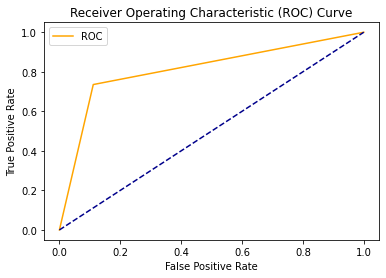

In [32]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
print(confusion_matrix(y_test, y_pred))
plot_roc_curve(fpr,tpr)

In [33]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
y_train_predict = rf_model.predict(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
y_pred = rf_model.predict(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 0.9999999999999999
RF test roc-auc: 0.9975972436953408


In [34]:
print("Accuracy Score of Model1_train : ", accuracy_score(y_train,y_train_predict))
print("Accuracy Score of Model1_test : ", accuracy_score(y_test,y_pred))
print("precision Score of Model1 : ", precision_score(y_test,y_pred))
print("recall Score of Model1 : ", recall_score(y_test,y_pred))

Accuracy Score of Model1_train :  1.0
Accuracy Score of Model1_test :  0.9606651742884554
precision Score of Model1 :  0.9286784537009289
recall Score of Model1 :  0.9974251689732861


In [35]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rf_model,X,y,cv=10)

In [36]:
print(score)
print(score.mean())

[0.91727494 0.89862125 0.92862936 0.87510138 0.89051095 0.87429035
 0.87104623 0.88564477 0.90024331 0.86861314]
0.8909975669099757


[[2909  238]
 [   8 3099]]


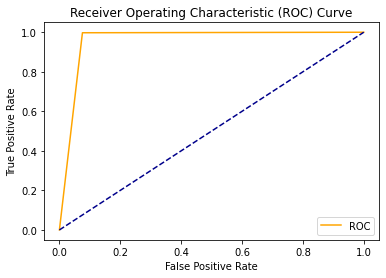

In [37]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
print(confusion_matrix(y_test, y_pred))
plot_roc_curve(fpr,tpr)

In [38]:
#### Applying XGb 
import xgboost
xgb_m=xgboost.XGBClassifier()
xgb_m.fit(X_train, y_train)
ytrain_pred = xgb_m.predict_proba(X_train)
y_train_predict = xgb_m.predict(X_train)
print('Xgboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = xgb_m.predict_proba(X_test)
y_pred = xgb_m.predict(X_test)
print('Xgboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

C:\Users\satya_omijkxl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:13:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgboost train roc-auc: 0.9990251354722325
Xgboost test roc-auc: 0.9799661046036355


In [39]:
print("Accuracy Score of Model1_train : ", accuracy_score(y_train,y_train_predict))
print("Accuracy Score of Model1_test : ", accuracy_score(y_test,y_pred))
print("precision Score of Model1 : ", precision_score(y_test,y_pred))
print("recall Score of Model1 : ", recall_score(y_test,y_pred))

Accuracy Score of Model1_train :  0.9853324194653873
Accuracy Score of Model1_test :  0.9437160217460825
precision Score of Model1 :  0.9125486672656484
recall Score of Model1 :  0.9806887672996459


In [40]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]   
}

In [41]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(xgb_m,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    9.2s finished
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:14:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimat...
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, subs

In [42]:
score=cross_val_score(random_search,X,y,cv=10,scoring='accuracy')

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    8.5s finished
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:14:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    8.4s finished
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:14:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    9.0s finished
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:14:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   10.8s finished
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.7s finished
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:14:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    9.7s finished
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:14:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.8s finished
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:15:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    7.5s finished
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:15:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.9s finished
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:15:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    9.5s finished
C:\Users\satya_omijkxl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:15:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [43]:
print(score)
print(score.mean())

[0.86780211 0.90510949 0.92781833 0.87915653 0.89537713 0.86699108
 0.86618005 0.89051095 0.88726683 0.87996756]
0.88661800486618


In [44]:
ytrain_pred = random_search.predict_proba(X_train)
y_train_predict = random_search.predict(X_train)
print('Xgboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = random_search.predict_proba(X_test)
y_pred = random_search.predict(X_test)
print('Xgboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))
print("Accuracy Score of Model1_train : ", accuracy_score(y_train,y_train_predict))
print("Accuracy Score of Model1_test : ", accuracy_score(y_test,y_pred))
print("precision Score of Model1 : ", precision_score(y_test,y_pred))
print("recall Score of Model1 : ", recall_score(y_test,y_pred))

Xgboost train roc-auc: 0.9984014206086914
Xgboost test roc-auc: 0.9801707533518265
Accuracy Score of Model1_train :  0.9823851953392735
Accuracy Score of Model1_test :  0.9437160217460825
precision Score of Model1 :  0.9147847034025895
recall Score of Model1 :  0.9777920823945928


In [45]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
print(confusion_matrix(y_test, y_pred))

[[2864  283]
 [  69 3038]]


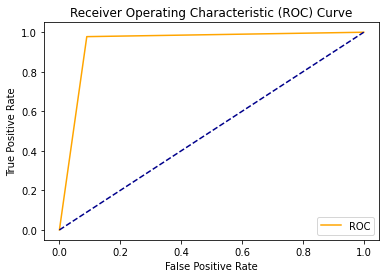

In [46]:
plot_roc_curve(fpr,tpr)